In [1]:
#default_exp word_count

# Etude des sujets des amendements PLFSS - Nuage de mots

## Affichage d'un nuage des mots les plus utilisés

In [2]:
#hide
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#export
import pickle
import pandas as pd
from urllib.request import urlopen
from collections import Counter
from wordcloud import WordCloud

# Nuage des mots les plus utilisés
A noter que l'on peut donner une forme au nuage : https://amueller.github.io/word_cloud/auto_examples/parrot.html#sphx-glr-auto-examples-parrot-py

In [10]:
#export
amdt = None
def load_data():
    global amdt
    #data_words = pickle.load(urlopen("https://github.com/leximpact/etudes-amendements/raw/nbdev/notebook/data/amdt_data_words.pickle"))
    data_words = pickle.load(open("./data/amdt_data_words.pickle", "rb"))
    print(data_words)
    #amdt = pd.read_csv('https://github.com/leximpact/etudes-amendements/raw/nbdev/notebook/data/amdt_sans_stopword.csv.gz')
    amdt = pd.read_csv('./data/amdt_sans_stopword.csv.gz')
    print(amdt.head())
    word_count = Counter(data_words)
    word_count.most_common(30)

In [11]:
#export
def build_word_cloud():
    # Join the different processed titles together.
    long_string = ' '.join(list(amdt['txt_sans_stopword'].values))
    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", width=1000, height=800, max_words=5000, contour_width=3, contour_color='steelblue')
    # Generate a word cloud
    wordcloud.generate(long_string)
    # Visualize the word cloud
    return wordcloud

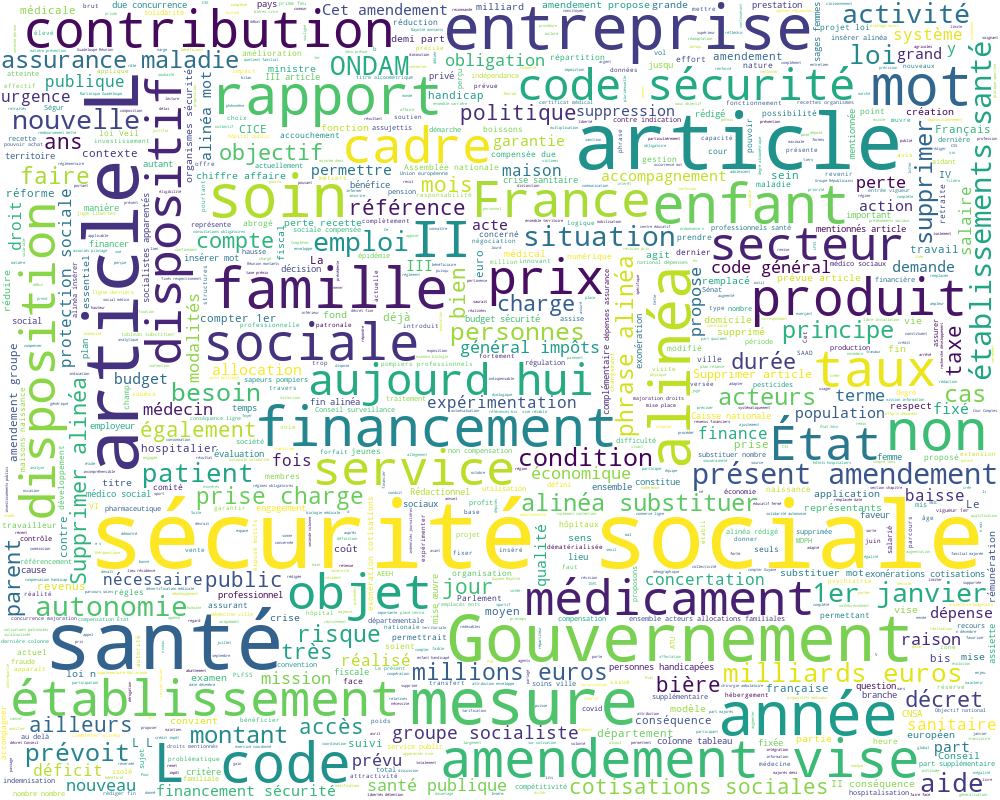

In [12]:
load_data()
build_word_cloud().to_image()

NameError: name 'data_words' is not defined

# Nuage des mots les plus utilisés, sur texte lemmatizé
A noter que l'on peut donner une forme au nuage : https://amueller.github.io/word_cloud/auto_examples/parrot.html#sphx-glr-auto-examples-parrot-py

In [14]:
#export
amdt = None
def load_data():
    global amdt
    #data_words = pickle.load(urlopen("https://github.com/leximpact/etudes-amendements/raw/nbdev/notebook/data/amdt_data_words.pickle"))
    data_words = pickle.load(open("data_csv/corpus.txt", "rb"))
    print(data_words)
    #amdt = pd.read_csv('https://github.com/leximpact/etudes-amendements/raw/nbdev/notebook/data/amdt_sans_stopword.csv.gz')
    amdt = pd.read_csv('data_csv/amdts_cleaned.csv')
    print(amdt.head())

    word_count = Counter(data_words)
    word_count.most_common(30)
    
#export
def build_word_cloud():
    # Join the different processed titles together.
    long_string = ' '.join(list(amdt.values))
    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", width=1000, height=800, max_words=5000, contour_width=3, contour_color='steelblue')
    # Generate a word cloud
    wordcloud.generate(long_string)
    # Visualize the word cloud
    return wordcloud

load_data()
build_word_cloud().to_image()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/Users/sasha/Desktop/LexImpact_Code/openfiscaenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,4

   Unnamed: 0          0           1          2            3          4  \
0           0    insérer  entreprise    salarié    employeur  autoriser   
1           1       code    sécurité     social    attribuer    insérer   
2           2  compléter    remettre  parlement     échéance    période   
3           3    insérer        code    limiter  possibilité  organiser   
4           4       code    sécurité     social    compléter    rédiger   

                 5           6          7                8  ... 1422 1423  \
0        attribuer          an   ensemble          salarié  ...  NaN  NaN   
1           verser        code   sécurité           social  ...  NaN  NaN   
2  expérimentation  évaluation     porter  contemporanéité  ...  NaN  NaN   
3       délégation        soin      cadre            prise  ...  NaN  NaN   
4        universel          an  politique         familial  ...  NaN  NaN   

  1424 1425 1426 1427 1428 1429 1430 1431  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN 

TypeError: sequence item 0: expected str instance, numpy.ndarray found